# MATHEMATICAL EPIDEMIOLOGY PRESENTATION

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import sympy as sp
import scipy.linalg as sl
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [2]:
#Defining the symbols.
z_t,s_t,i_t= sp.symbols('z_t,s_t,i_t')
a_1,b_1,c_1,a_2,b_2,c_2,d_2=sp.symbols('a_1,b_1,c_1,a_2,b_2,c_2,d_2')

In [3]:
#Equations representing our system
dot_z_t=-z_t+z_t*s_t-z_t*i_t
display(dot_z_t)
dot_s_t=s_t-z_t*s_t-0.5*s_t*i_t+i_t
display(dot_s_t)
dot_i_t=i_t-z_t*i_t+0.5*s_t*i_t-i_t
display(dot_i_t)

In [4]:
#Creating equations from the expressions above.
zEq = sp.Eq(dot_z_t,0)
display(zEq)
sEq = sp.Eq(dot_s_t,0)
display(sEq)
iEq = sp.Eq(dot_i_t,0)
display(iEq)

In [5]:
#Determining the equilibrium points.
EqPnts = sp.solve( (zEq,sEq,iEq), z_t,s_t,i_t )
print(EqPnts)

[(0.0, 0.0, 0.0), (0.250000000000000, 0.500000000000000, -0.500000000000000), (1.00000000000000, 1.00000000000000, 0.0), (1.00000000000000, 2.00000000000000, 1.00000000000000)]


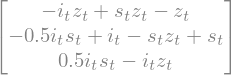

In [6]:
#Linearization of the system.
Matrix=sp.Matrix([dot_z_t,dot_s_t,dot_i_t])
Matrix

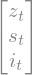

In [7]:
Mat=sp.Matrix([z_t,s_t,i_t])
Mat

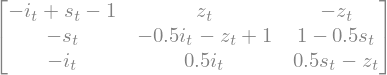

In [8]:
JacobianMat=Matrix.jacobian(Mat)
JacobianMat

In [9]:
EV1=JacobianMat.eigenvals()
#display(EV1)

# Evaluating Jacobian Matrix at point (1,2,1)

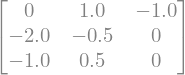

In [10]:
p=EqPnts[3][0]
q=EqPnts[3][1]
r=EqPnts[3][2]
Jacsub=JacobianMat.subs([(z_t,p),(s_t,q),(i_t,r)])
Jacsub

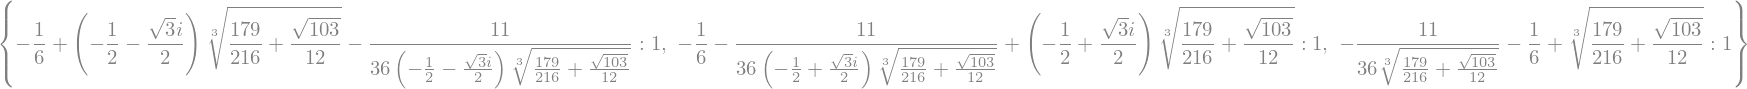

In [11]:
eigenvalues=Jacsub.eigenvals()
eigenvalues

# Evaluating Jacobian Matrix at point (1,1,0)

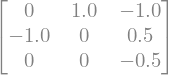

In [12]:
p=EqPnts[2][0]
q=EqPnts[2][1]
r=EqPnts[2][2]
Jacsub=JacobianMat.subs([(z_t,p),(s_t,q),(i_t,r)])
Jacsub

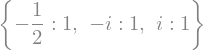

In [13]:
eigenvalues=Jacsub.eigenvals()
eigenvalues

# Our equation without replacing the constants

In [14]:
#Equations representing our system
Dot_z_t=-a_1*z_t+b_1*z_t*s_t-c_1*z_t*i_t
display(Dot_z_t)
Dot_s_t=a_2*s_t-b_2*z_t*s_t-c_2*s_t*i_t+d_2*i_t
display(Dot_s_t)
Dot_i_t=a_2*i_t-b_2*z_t*i_t+c_2*s_t*i_t-d_2*i_t
display(Dot_i_t)

In [15]:
#Creating equations from the expressions above.
zEQ = sp.Eq(Dot_z_t,0)
display(zEQ)
sEQ = sp.Eq(Dot_s_t,0)
display(sEQ)
iEQ = sp.Eq(Dot_i_t,0)
display(iEQ)

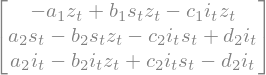

In [16]:
#Linearization of the system.
Matrix1=sp.Matrix([Dot_z_t,Dot_s_t,Dot_i_t])
Matrix1

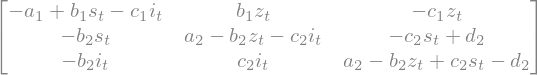

In [17]:
JacobianMat1=Matrix1.jacobian(Mat)
JacobianMat1

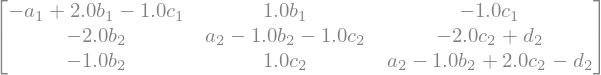

In [18]:
p=EqPnts[3][0]
q=EqPnts[3][1]
r=EqPnts[3][2]
Jacsub1=JacobianMat1.subs([(z_t,p),(s_t,q),(i_t,r)])
Jacsub1

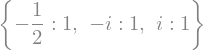

In [19]:
eigenvalues=Jacsub.eigenvals()
eigenvalues

# Plotting the Graph.

In [142]:
#Stating the initial conditions given.
z_t=0.9
s_t=1.9
i_t=0.8
#Stating the parameter values given
a_1=1;b_1=1;c_1=1;a_2=1;b_2=1;c_2=0.5;d_2=1

#Definig a function of the system given that will return the values of each compartment
#def system(t,I):
 #   Dot_z_t=-a_1*I[0]+b_1*I[0]*I[1]-c_1*I[0]*I[2]
  #  Dot_s_t=a_2*I[1]-b_2*I[0]*I[1]-c_2*I[1]*I[2]+d_2*I[2]
   # Dot_i_t=a_2*I[2]-b_2*I[0]*I[2]+c_2*I[1]*I[2]-d_2*I[2]
    #return [Dot_z_t,Dot_s_t,Dot_i_t]

def system(t,I):
    Dot_z_t=-a_1*I[0]+b_1*I[0]*I[1]
    Dot_s_t=a_2*I[1]-b_2*I[0]*I[1]
    return [Dot_z_t,Dot_s_t]

In [143]:
#Solution = solve_ivp(system,(0,20),[z_t,s_t,i_t],max_step = 1)
Solution = solve_ivp(system,(0,20),[z_t,s_t],max_step = 1)
#Solution

No handles with labels found to put in legend.


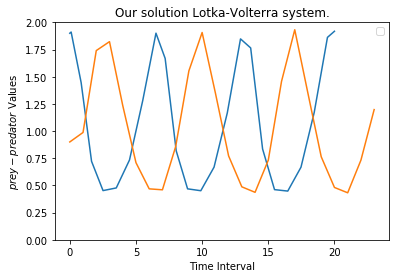

In [144]:
#Plotting on the same graph the solution curves of the system.
time = Solution.t   #From our definition above.
Values = Solution.y  #The array of our solution values.
z_t = Values[0]; s_t = Values[1]; #i_t = Values[2];  
#plt.plot(time,z_t,"red",label="predator")
#plt.plot(time,s_t,"Blue",label="health prey")
#plt.plot(time,i_t,"Orange",label="infected prey")
#xmin, xmax, ymin, ymax = axis([0, 20, 0, 2])
#ax.set(xlim=(0, 20), ylim=(0, 2))
plt.plot(time,s_t,z_t)
plt.title("Our solution Lotka-Volterra system.")
plt.xlabel("Time Interval")
plt.ylabel("$prey-predator$ Values")
plt.legend()
plt.ylim(0.,2)

In [145]:
#Stating the initial conditions given.
z_t=0.9
s_t=1.9
i_t=0.8
#Stating the parameter values given
a_1=1;b_1=1;c_1=1;a_2=1;b_2=1;c_2=0.5;d_2=1

#Definig a function of the system given that will return the values of each compartment
def system(t,I):
    Dot_z_t=-a_1*I[0]+b_1*I[0]*I[1]-c_1*I[0]*I[2]
    Dot_s_t=a_2*I[1]-b_2*I[0]*I[1]-c_2*I[1]*I[2]+d_2*I[2]
    Dot_i_t=a_2*I[2]-b_2*I[0]*I[2]+c_2*I[1]*I[2]-d_2*I[2]
    return [Dot_z_t,Dot_s_t,Dot_i_t]



In [146]:
Solution = solve_ivp(system,(0,20),[z_t,s_t,i_t],max_step = 1)
#Solution = solve_ivp(system,(0,20),[z_t,s_t],max_step = 1)
#Solution

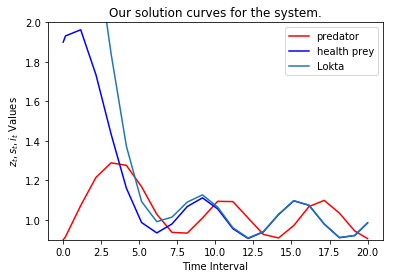

In [147]:
#Plotting on the same graph the solution curves of the system.
time = Solution.t   #From our definition above.
Values = Solution.y  #The array of our solution values.
z_t = Values[0]; s_t = Values[1]; i_t = Values[2];  
plt.plot(time,z_t,"red",label="predator")
plt.plot(time,s_t,"Blue",label="health prey")
#plt.plot(time,i_t,"green",label="infected prey")
#plt.plot(time,s_t,z_t)
#plt.plot(time,z_t,label="Lokta")
plt.plot(time,s_t+i_t,label="Lokta")
plt.title("Our solution curves for the system.")
plt.xlabel("Time Interval")
plt.ylabel("$z_t,s_t,i_t$ Values")
plt.ylim(0.9,2)
plt.legend()

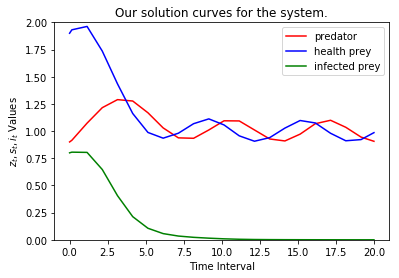

In [148]:
#Plotting on the same graph the solution curves of the system.
time = Solution.t   #From our definition above.
Values = Solution.y  #The array of our solution values.
z_t = Values[0]; s_t = Values[1]; i_t = Values[2];  
plt.plot(time,z_t,"red",label="predator")
plt.plot(time,s_t,"Blue",label="health prey")
plt.plot(time,i_t,"green",label="infected prey")
#plt.plot(time,s_t,z_t)
#plt.plot(time,z_t+i_t,label="Lokta")
#plt.plot(time,s_t,label="Lokta")
plt.title("Our solution curves for the system.")
plt.xlabel("Time Interval")
plt.ylabel("$z_t,s_t,i_t$ Values")
plt.ylim(0,2)
plt.legend()

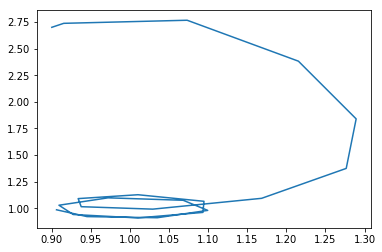

In [114]:
plt.plot(z_t,(s_t+i_t))


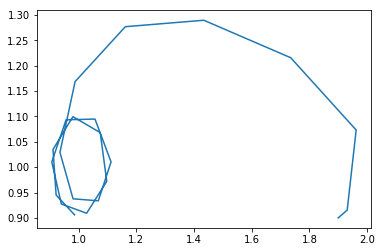

In [27]:
plt.plot(s_t,z_t)

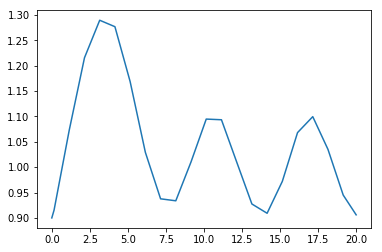

In [32]:
plt.plot(time,z_t)

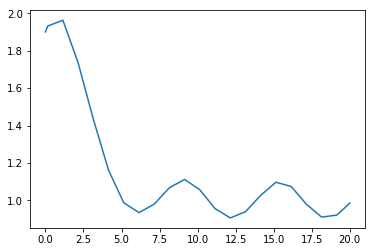

In [33]:
plt.plot(time,s_t)

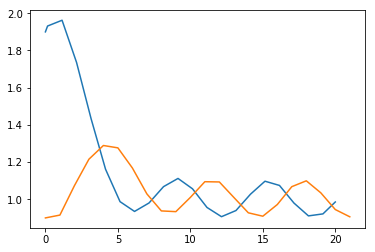

In [34]:
plt.plot(time,s_t,z_t)